# MATH 313

In this notebook, we will reconstruct Earth's image using deterministic and random SVDs. Try changing the value of the target rank, defined as r, for seeing the progression of reconstruction.

## RGB to Gray

First, we will go over basics of using images in Julia. For this, you need to install packages ImageCore, Images, and FileIO.

In [8]:
#Call all image packages
using ImageCore, Images, FileIO

In [128]:
#load the location of the images
push!(LOAD_PATH,"/Users/avleenkaur/My Documents/JuliaFiles")

6-element Vector{String}:
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/avleenkaur/My Documents/JuliaFiles"
 "/Users/avleenkaur/My Documents/JuliaFiles"
 "/Users/avleenkaur/My Documents/JuliaFiles"

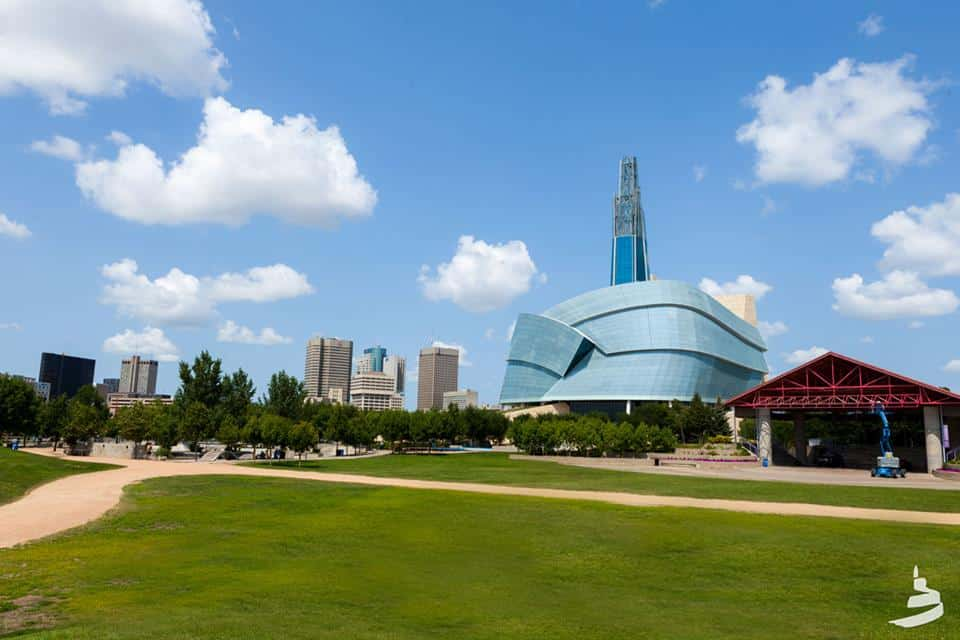

In [129]:
#input any image
rgb_img=load("Human-Rights.jpeg")

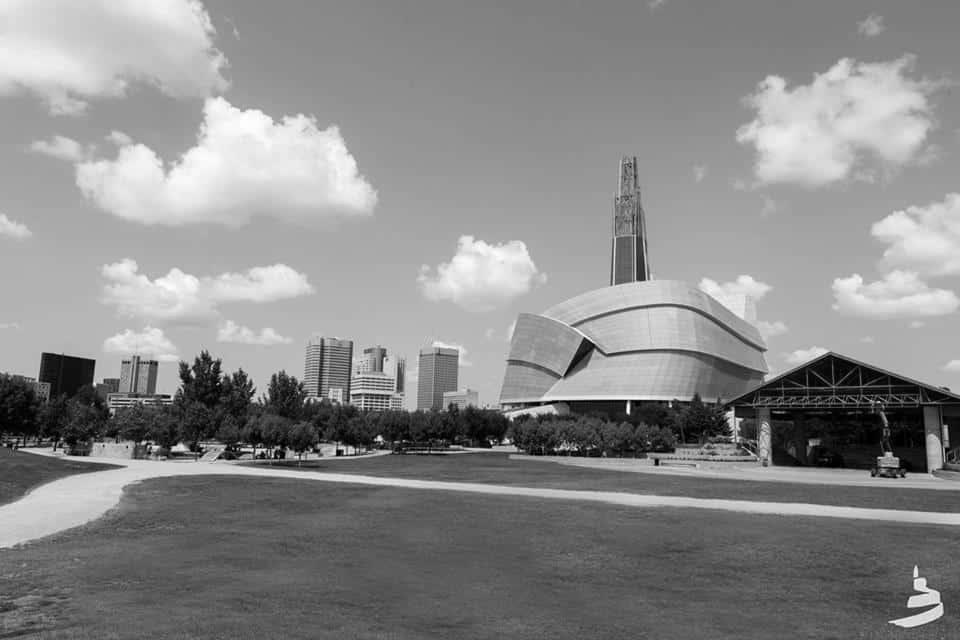

In [130]:
#converting RGB images to grayscale
gray_img=Gray.(rgb_img)

# Reconstruction of image

Now, we will reconstruct image of Earth using SVD and randomized SVD.

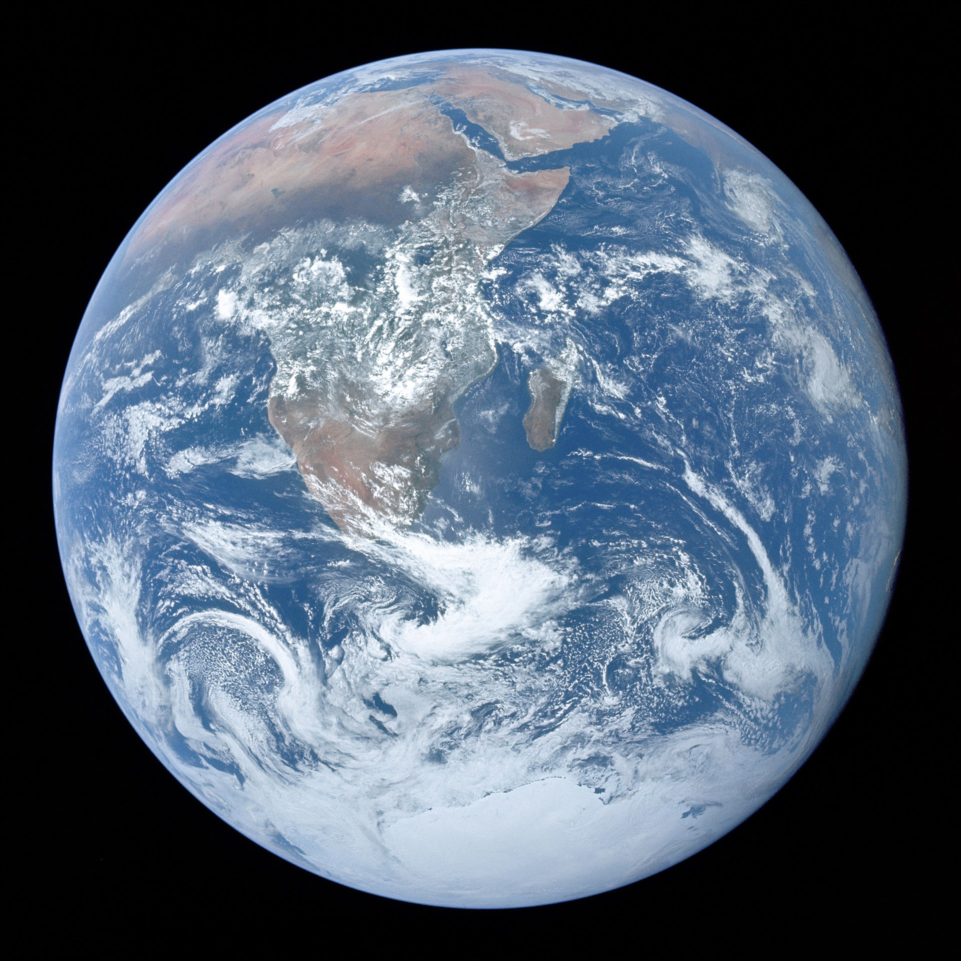

In [131]:
#Input the image of Earth, this is RGB by default
A=load("Earth.jpeg")

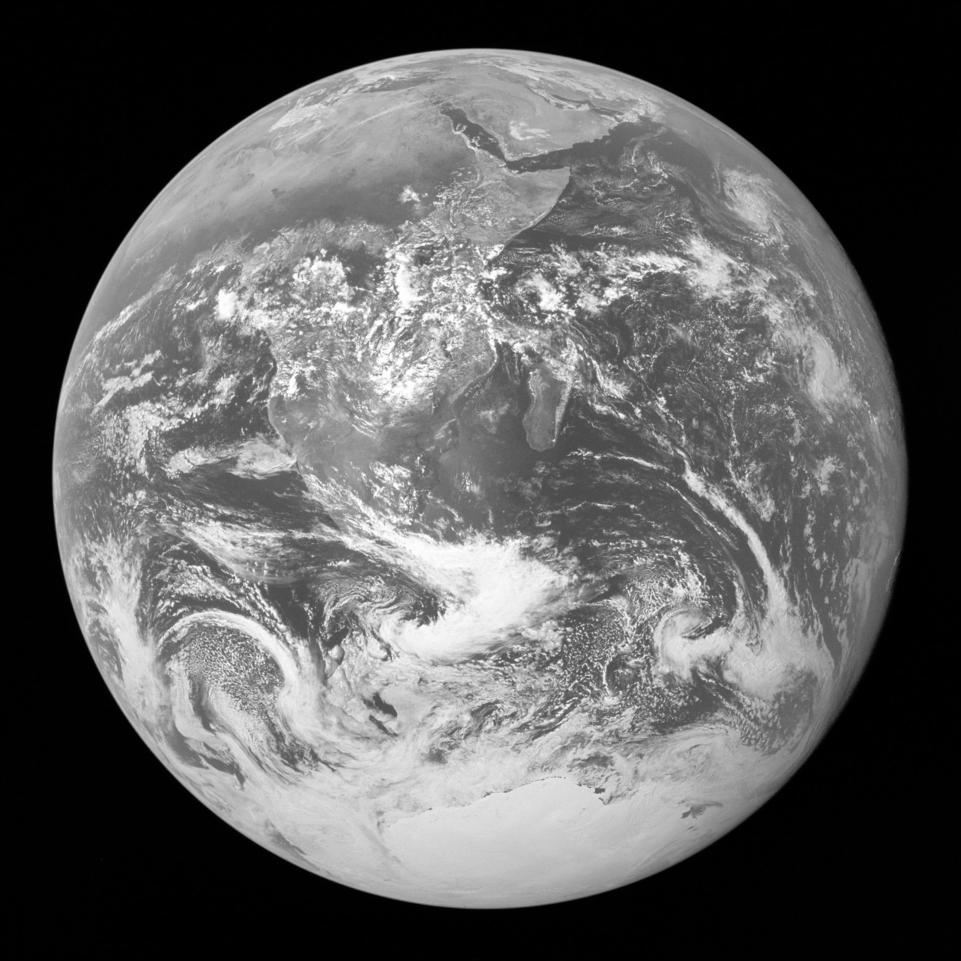

In [132]:
#convert it to gray scale
X=Gray.(A)

In [18]:
#Check what X is!
typeof(X)

Matrix{Gray{N0f8}} (alias for Array{Gray{Normed{UInt8, 8}}, 2})

X is a Matrix with Grayscale entries, defining the intensity of each pixel in the image of X.

## 1. Deterministic SVD

Let us first try using the usual SVD algorithm. For this, we need the LinearAlgebra package.

In [20]:
using LinearAlgebra

In [133]:
#Calculate SVD
U,s,V=svd(X);

In [134]:
#check size of U
size(U)

(1920, 1920)

In [136]:
#rank of X
rx=rank(X)

1194

In [112]:
#singular values of X
s

1920-element Vector{Float32}:
 861.7482
 219.76598
 135.99892
  99.746956
  81.3539
  70.58097
  58.841267
  50.10784
  47.69511
  42.912678
  41.3328
  39.4036
  36.43727
   ⋮
   0.00050481636
   0.0004842499
   0.000420867
   0.000329966
   0.00028612904
   0.0002664066
   0.00024049474
   0.00020128232
   0.0001727137
   0.00010147951
   7.107124f-5
   2.0686357f-5

In [137]:
#convert vector of singular values to a diagonal matrix
S=diagm(s)

1920×1920 Matrix{Float32}:
 861.748    0.0      0.0     0.0    …  0.0         0.0         0.0
   0.0    219.766    0.0     0.0       0.0         0.0         0.0
   0.0      0.0    135.999   0.0       0.0         0.0         0.0
   0.0      0.0      0.0    99.747     0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0    …  0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0    …  0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   0.0      0.0      0.0     0.0       0.0         0.0         0.0
   ⋮                                ⋱                          
   0.0      0.0      0.0     0.0      

In [138]:
# Target rank
#### Change this rank to see changes in the result!######
r = 10; 
# Oversampling parameter
p = 5;  

In [139]:
#Reconstruction by using r-rank SVD approximation 
XSVD = U[:,1:r]*S[1:r,1:r]*V[:,1:r]';     
#error in approximation
error_SVD = norm(X-XSVD,2)/norm(X,2)

0.20015072865656236

## 2. Randomized SVD

In [140]:
#number of columns of X
ny=size(X,2);
#define the projection matrix
P=randn(ny,r+p);
#define sketch of the matrix as Z
Z=X*P;
#find the orthonormal basis for Z
Q,R=qr(Float64.(Z));
#truncated Q, IDK how to get compact Q yet lol
Qt=Q[:,1:rx];
#define Y as a 
Y=Qt'*X;
UY,rs,rV=svd(Y);
rS=diagm(rs);
rU=Qt*UY; 
size(Z)

(1920, 15)

In [142]:
# Reconstruction
XrSVD = rU[:,1:r]*rS[1:r,1:r]*rV[:,1:r]'; # rSVD approx.
error_rSVD = norm(X-XrSVD,2)/norm(X,2)

0.2237557550521389

## Plots

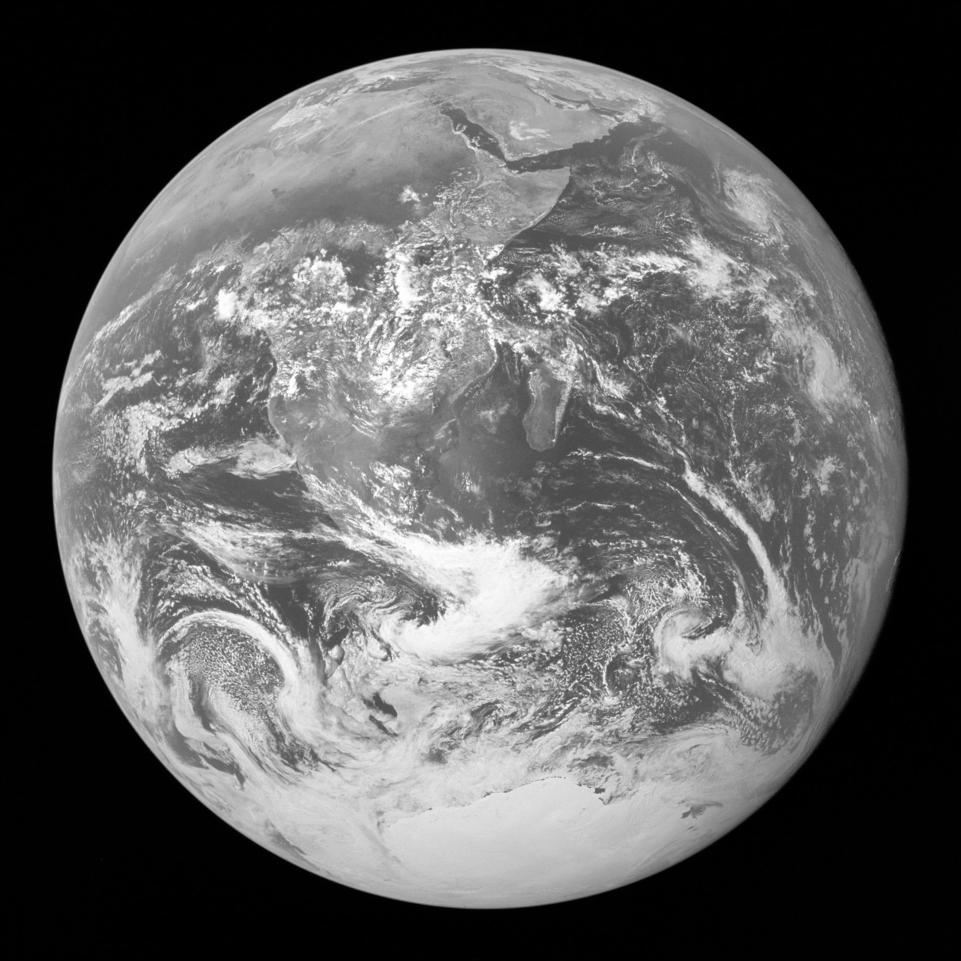

In [143]:
#Exact X
X

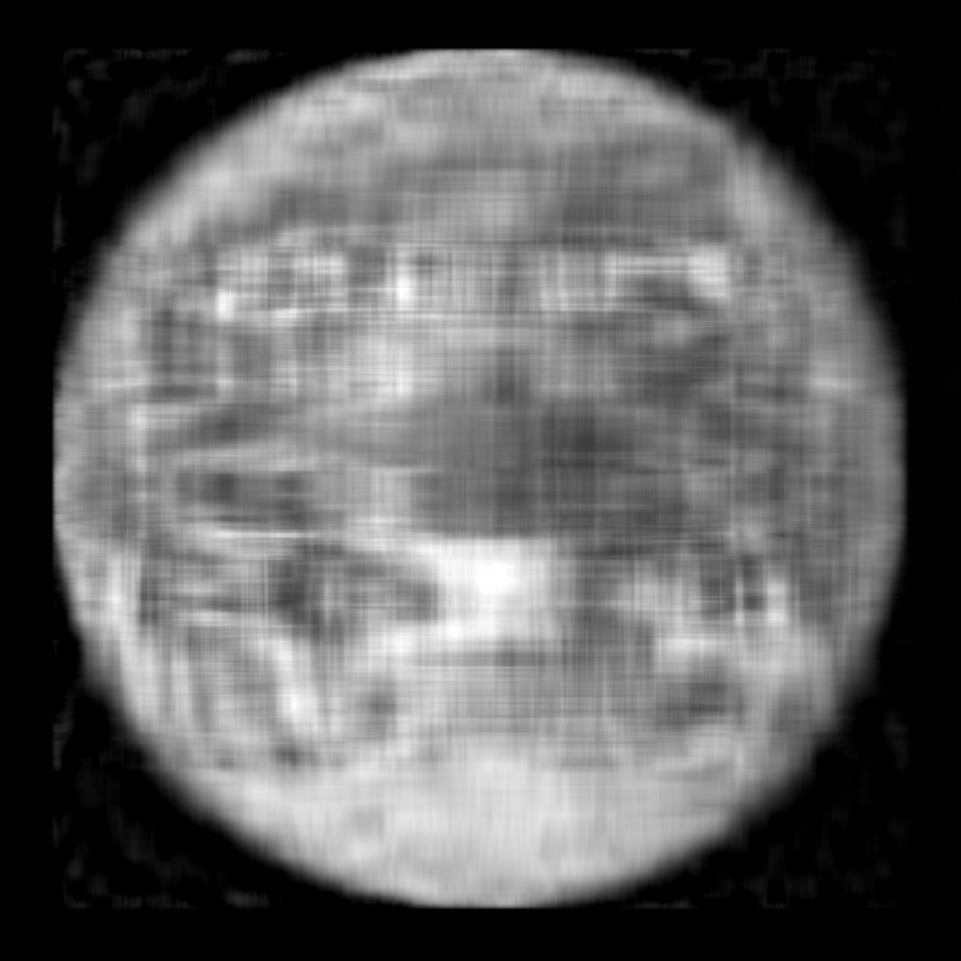

In [144]:
#Reconstruction from Deterministic SVD
Gray.(XSVD)

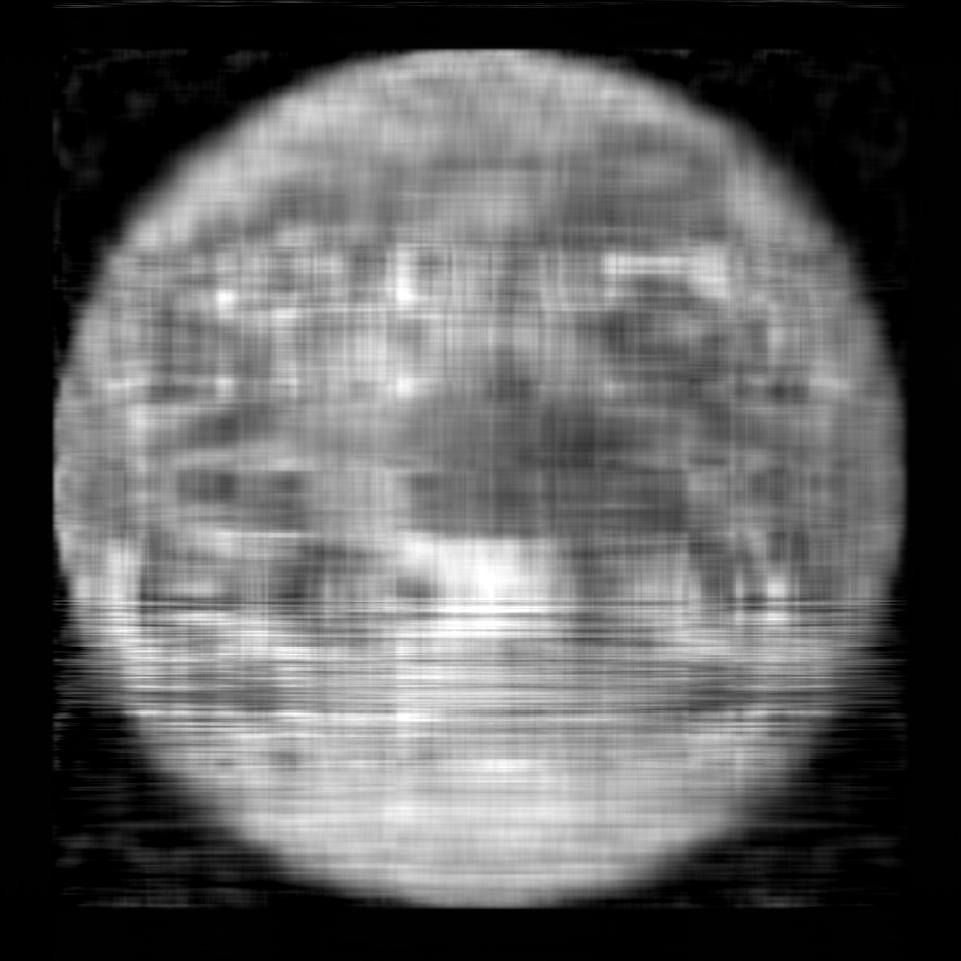

In [145]:
#reconstruction from Random SVD
Gray.(XrSVD)